In [1]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from warnings import filterwarnings
import pandas as pd
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.image as mpimg
filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\DELL\Anaconda3\envs\work\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\envs\work\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\envs\work\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\envs\work\lib\site-packages\tensorflow\python\framework

In [2]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
#Training Set
train_set = train_datagen.flow_from_directory('train',target_size=(64,64),batch_size=32,class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('test',target_size=(64,64),batch_size = 32,class_mode='binary',shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('test1',target_size=(64,64),batch_size=32,shuffle=False)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:
classifier.fit_generator(train_set,steps_per_epoch=800,epochs = 50,validation_data = test_set,
                         validation_steps = 20,)
#callbacks=[tensorboard]

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
625/625 [==============================] - 919s 1s/step - loss: 0.6152 - acc: 0.6529 - val_loss: 0.5346 - val_acc: 0.7332
Epoch 2/200
625/625 [==============================] - 297s 474ms/step - loss: 0.5254 - acc: 0.7408 - val_loss: 0.5035 - val_acc: 0.7480
Epoch 3/200
625/625 [==============================] - 299s 479ms/step - loss: 0.4806 - acc: 0.7691 - val_loss: 0.4593 - val_acc: 0.7850
Epoch 4/200
625/625 [==============================] - 293s 469ms/step - loss: 0.4540 - acc: 0.7860 - val_loss: 0.4359 - val_acc: 0.7974
Epoch 5/200
625/625 [==============================] - 289s 463ms/step - loss: 0.4334 - acc: 0.7976 - val_loss: 0.4223 - val_acc: 0.8022
Epoch 6/200
625/625 [==============================] - 288s 460ms/step - loss: 0.4105 - acc: 0.8104 - val_loss: 0.4319 - val_acc: 0.7956
Epoch 7/200
625/625 [==============================] - 284s 455ms/step - loss: 0.3972 - acc: 0.8226 - val_loss: 0.4157 - val_acc: 0.8

625/625 [==============================] - 249s 399ms/step - loss: 0.0784 - acc: 0.9696 - val_loss: 0.7454 - val_acc: 0.8022
Epoch 37/200
625/625 [==============================] - 199s 319ms/step - loss: 0.0802 - acc: 0.9706 - val_loss: 0.7852 - val_acc: 0.8038
Epoch 38/200
625/625 [==============================] - 241s 385ms/step - loss: 0.0737 - acc: 0.9721 - val_loss: 0.8515 - val_acc: 0.8044
Epoch 39/200
625/625 [==============================] - 242s 386ms/step - loss: 0.0784 - acc: 0.9702 - val_loss: 0.8139 - val_acc: 0.8126
Epoch 40/200
625/625 [==============================] - 245s 392ms/step - loss: 0.0685 - acc: 0.9750 - val_loss: 0.8167 - val_acc: 0.8076
Epoch 41/200
625/625 [==============================] - 252s 402ms/step - loss: 0.0714 - acc: 0.9732 - val_loss: 0.8197 - val_acc: 0.8054
Epoch 42/200
625/625 [==============================] - 242s 387ms/step - loss: 0.0634 - acc: 0.9766 - val_loss: 0.9240 - val_acc: 0.8000
Epoch 43/200
625/625 [=========================

KeyboardInterrupt: 

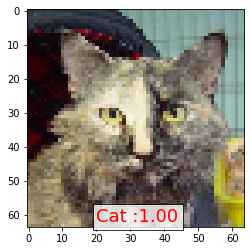

In [8]:
img1 = image.load_img('test/cat/cat.10.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [9]:
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cat\cat.0.jpg,0.00001,0,0
1,cat\cat.1.jpg,0.00000,0,0
2,cat\cat.10.jpg,0.00016,0,0
3,cat\cat.100.jpg,0.70287,0,1
4,cat\cat.1000.jpg,0.00000,0,0
5,cat\cat.1001.jpg,0.11562,0,0
6,cat\cat.1002.jpg,0.00000,0,0
7,cat\cat.1003.jpg,0.94355,0,1
8,cat\cat.1004.jpg,0.99722,0,1
9,cat\cat.1005.jpg,0.00000,0,0


In [11]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 949


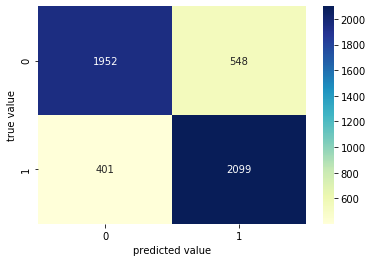

In [12]:
conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

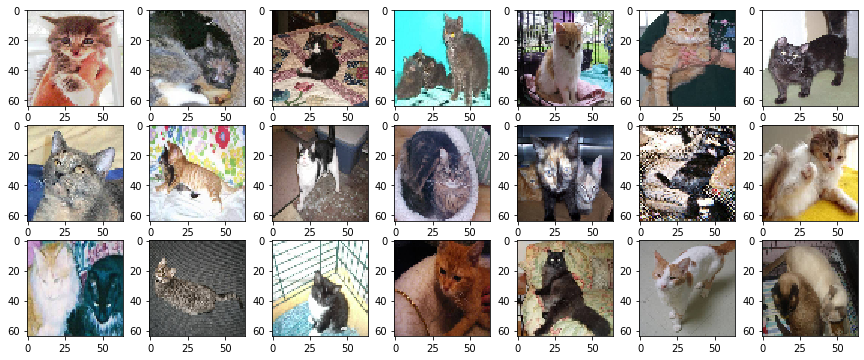

In [13]:
CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('test/'+CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()